Importing Libraries


In [80]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import probplot

Loading The dataset

In [81]:
df=pd.read_excel("/content/sample_data/DS - Assignment Part 1 data set.xlsx")

Performing EDA

In [82]:
df.head()

,Transaction date,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area
0,2012.916667,32.0,84.87882,10,24.98298,121.54024,1,575,37.9
1,2012.916667,19.5,306.59470,9,24.98034,121.53951,2,1240,42.2
2,2013.583333,13.3,561.98450,5,24.98746,121.54391,3,1060,47.3
3,2013.500000,13.3,561.98450,5,24.98746,121.54391,2,875,54.8
4,2012.833333,5.0,390.56840,5,24.97937,121.54245,1,491,43.1


In [83]:
df.shape

(414, 9)

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 9 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Transaction date                          414 non-null    float64
 1   House Age                                 414 non-null    float64
 2   Distance from nearest Metro station (km)  414 non-null    float64
 3   Number of convenience stores              414 non-null    int64  
 4   latitude                                  414 non-null    float64
 5   longitude                                 414 non-null    float64
 6   Number of bedrooms                        414 non-null    int64  
 7   House size (sqft)                         414 non-null    int64  
 8   House price of unit area                  414 non-null    float64
dtypes: float64(6), int64(3)
memory usage: 29.2 KB


In [85]:
df.describe()

,Transaction date,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,2013.148953,17.712560,1083.885689,4.094203,24.969030,121.533361,1.987923,931.475845,37.980193
std,0.281995,11.392485,1262.109595,2.945562,0.012410,0.015347,0.818875,348.910269,13.606488
min,2012.666667,0.000000,23.382840,0.000000,24.932070,121.473530,1.000000,402.000000,7.600000
25%,2012.916667,9.025000,289.324800,1.000000,24.963000,121.528085,1.000000,548.000000,27.700000
50%,2013.166667,16.100000,492.231300,4.000000,24.971100,121.538630,2.000000,975.000000,38.450000
75%,2013.416667,28.150000,1454.279000,6.000000,24.977455,121.543305,3.000000,1234.750000,46.600000
max,2013.583333,43.800000,6488.021000,10.000000,25.014590,121.566270,3.000000,1500.000000,117.500000


In [86]:
df.columns

Index(['Transaction date', 'House Age',
       'Distance from nearest Metro station (km)',
       'Number of convenience stores', 'latitude', 'longitude',
       'Number of bedrooms', 'House size (sqft)', 'House price of unit area'],
      dtype='object')

In [87]:
df.isnull().sum()

Transaction date                            0
House Age                                   0
Distance from nearest Metro station (km)    0
Number of convenience stores                0
latitude                                    0
longitude                                   0
Number of bedrooms                          0
House size (sqft)                           0
House price of unit area                    0
dtype: int64

In [88]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
409    False
410    False
411    False
412    False
413    False
Length: 414, dtype: bool

In [89]:
df.rename({'Transaction date':'Date','House Age':'Age','Distance from nearest Metro station (km)':'Distance','Number of convenience stores':'Stores','House size (sqft)':'Area','House price of unit area':'Price'},axis=1,inplace=True)



In [90]:
df

,Date,Age,Distance,Stores,latitude,longitude,Number of bedrooms,Area,Price
0,2012.916667,32.0,84.87882,10,24.98298,121.54024,1,575,37.9
1,2012.916667,19.5,306.59470,9,24.98034,121.53951,2,1240,42.2
2,2013.583333,13.3,561.98450,5,24.98746,121.54391,3,1060,47.3
3,2013.500000,13.3,561.98450,5,24.98746,121.54391,2,875,54.8
4,2012.833333,5.0,390.56840,5,24.97937,121.54245,1,491,43.1
...,...,...,...,...,...,...,...,...,...
409,2013.000000,13.7,4082.01500,0,24.94155,121.50381,3,803,15.4
410,2012.666667,5.6,90.45606,9,24.97433,121.54310,2,1278,50.0
411,2013.250000,18.8,390.96960,7,24.97923,121.53986,1,503,40.6
412,2013.000000,8.1,104.81010,5,24.96674,121.54067,1,597,52.5


In [91]:
for col in df.columns:
        print(f"Skewness of {col}:",df[col].skew())
        print(f"Kurtosis of {col}:",df[col].kurtosis())

Skewness of Date: -0.15083434578742608
Kurtosis of Date: -1.2319464389538053
Skewness of Age: 0.38292623077299737
Kurtosis of Age: -0.8771201112290763
Skewness of Distance: 1.8887565801256048
Kurtosis of Distance: 3.20786836751181
Skewness of Stores: 0.15460656758377123
Kurtosis of Stores: -1.0657514990134194
Skewness of latitude: -0.4385984450390504
Kurtosis of latitude: 0.26906977798608933
Skewness of longitude: -1.2195914979891498
Kurtosis of longitude: 1.2017924639738427
Skewness of Number of bedrooms: 0.022309017612164857
Kurtosis of Number of bedrooms: -1.5084574767476928
Skewness of Area: -0.11362728091036625
Kurtosis of Area: -1.4220194906438015
Skewness of Price: 0.5998525842660576
Kurtosis of Price: 2.1790970477396163


In [92]:
import warnings
warnings.filterwarnings('ignore')

Data Visualization

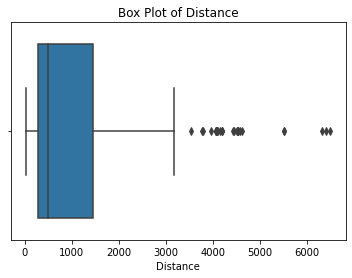

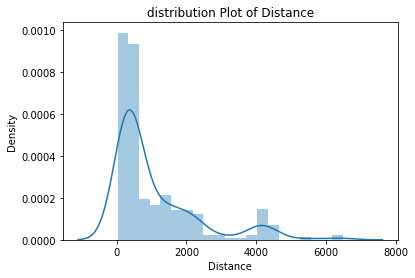

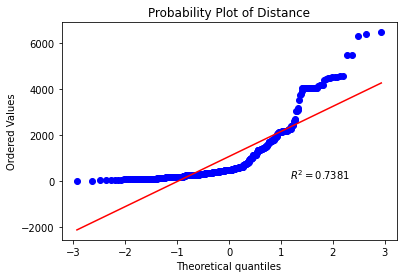

In [93]:
sns.boxplot(df['Distance'])
plt.title(f'Box Plot of Distance')
plt.show()
sns.distplot(df['Distance'])
plt.title(f'distribution Plot of Distance')
plt.show()
probplot(df['Distance'],plot=plt,rvalue=True)
plt.title(f'Probability Plot of Distance')
plt.show();

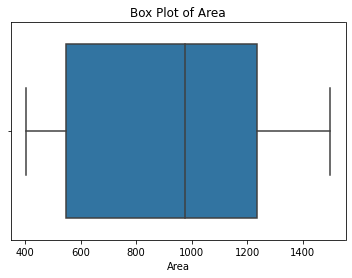

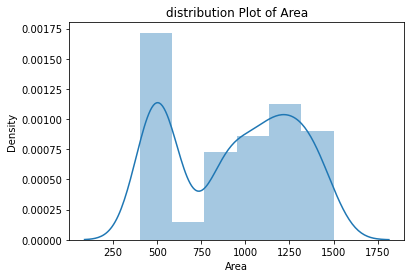

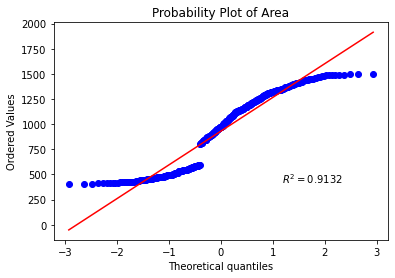

In [94]:
sns.boxplot(df['Area'])
plt.title(f'Box Plot of Area')
plt.show()
sns.distplot(df['Area'])
plt.title(f'distribution Plot of Area')
plt.show()
probplot(df['Area'],plot=plt,rvalue=True)
plt.title(f'Probability Plot of Area')
plt.show();

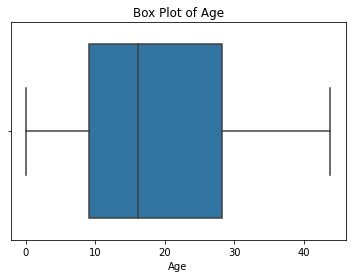

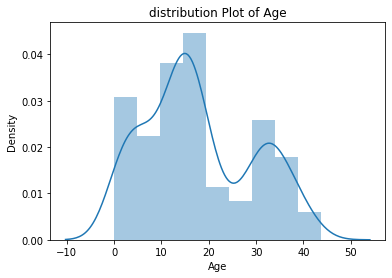

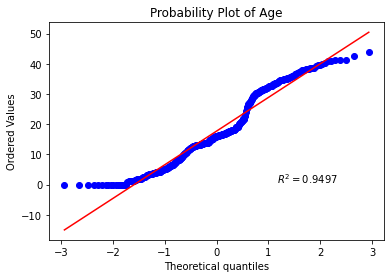

In [95]:
sns.boxplot(df['Age'])
plt.title(f'Box Plot of Age')
plt.show()
sns.distplot(df['Age'])
plt.title(f'distribution Plot of Age')
plt.show()
probplot(df['Age'],plot=plt,rvalue=True)
plt.title(f'Probability Plot of Age')
plt.show();

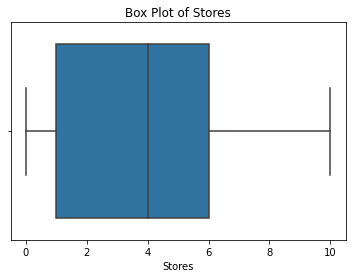

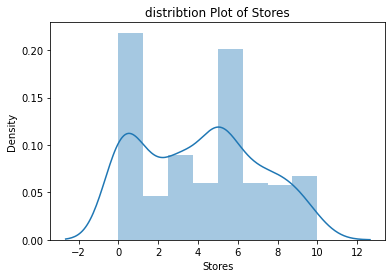

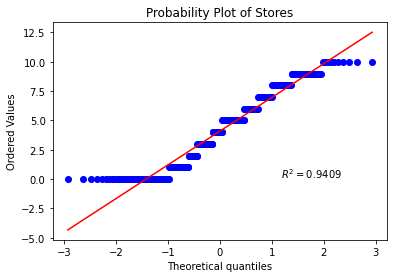

In [96]:
sns.boxplot(df['Stores'])
plt.title(f'Box Plot of Stores')
plt.show()
sns.distplot(df['Stores'])
plt.title(f'distribtion Plot of Stores')
plt.show()
probplot(df['Stores'],plot=plt,rvalue=True)
plt.title(f'Probability Plot of Stores')
plt.show();

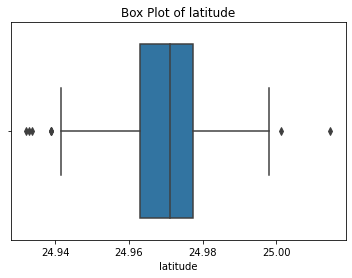

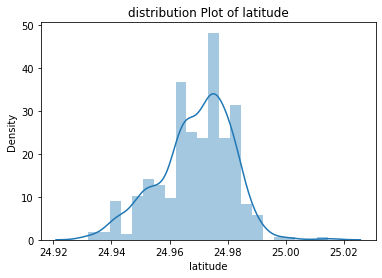

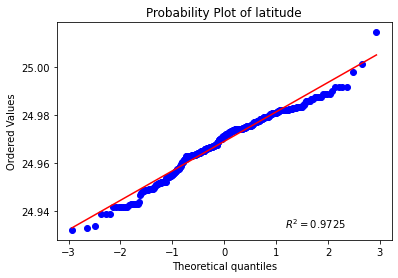

In [97]:
sns.boxplot(df['latitude'])
plt.title(f'Box Plot of latitude')
plt.show()
sns.distplot(df['latitude'])
plt.title(f'distribution Plot of latitude')
plt.show()
probplot(df['latitude'],plot=plt,rvalue=True)
plt.title(f'Probability Plot of latitude')
plt.show();

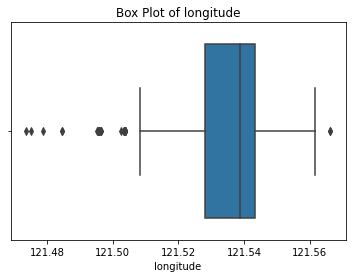

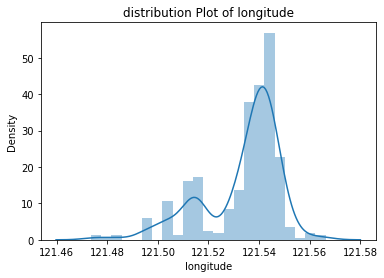

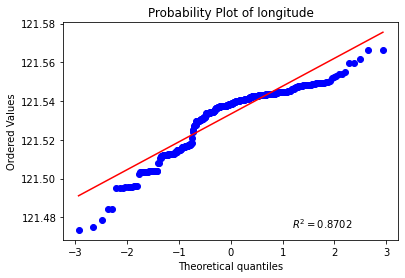

In [98]:
sns.boxplot(df['longitude'])
plt.title(f'Box Plot of longitude')
plt.show()
sns.distplot(df['longitude'])
plt.title(f'distribution Plot of longitude')
plt.show()
probplot(df['longitude'],plot=plt,rvalue=True)
plt.title(f'Probability Plot of longitude')
plt.show();

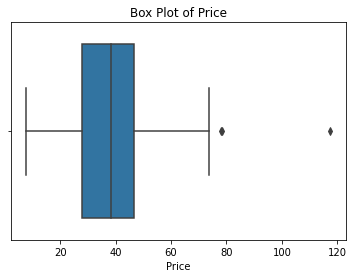

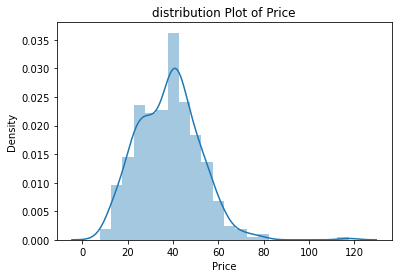

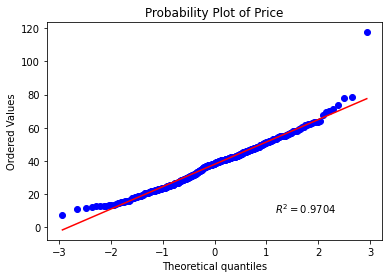

In [99]:
sns.boxplot(df['Price'])
plt.title(f'Box Plot of Price')
plt.show()
sns.distplot(df['Price'])
plt.title(f'distribution Plot of Price')
plt.show()
probplot(df['Price'],plot=plt,rvalue=True)
plt.title(f'Probability Plot of Price')
plt.show();

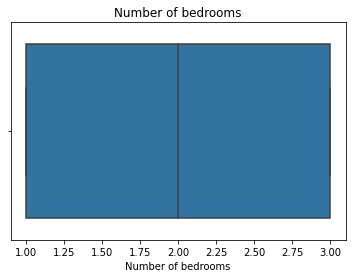

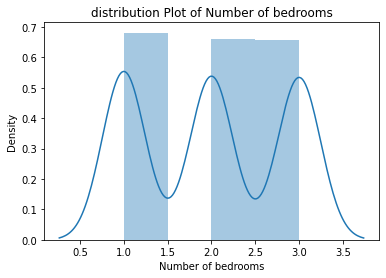

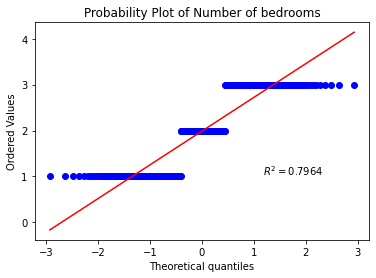

In [100]:
sns.boxplot(df['Number of bedrooms'])
plt.title(f'Number of bedrooms')
plt.show()
sns.distplot(df['Number of bedrooms'])
plt.title(f'distribution Plot of Number of bedrooms')
plt.show()
probplot(df['Number of bedrooms'],plot=plt,rvalue=True)
plt.title(f'Probability Plot of Number of bedrooms')
plt.show();

The features which have a right skewed distribution are house age, distance from the nearest metro station and the target feature i.e. house price whereas those which have a left-skewed distribution are latitude and longitude.


In [101]:
df.corr()['Area'].sort_values(ascending=False)[1:]

Number of bedrooms    0.752276
Date                  0.068405
Price                 0.046489
Stores                0.033286
latitude              0.031696
longitude             0.009322
Distance              0.001795
Age                  -0.060361
Name: Area, dtype: float64

The number of convenience stores, latitude and longitude are the features that have a significant positive correlation with the target house price feature. On the other hand, distance from the nearest metro station (in km) has a high negative correlation with house price.


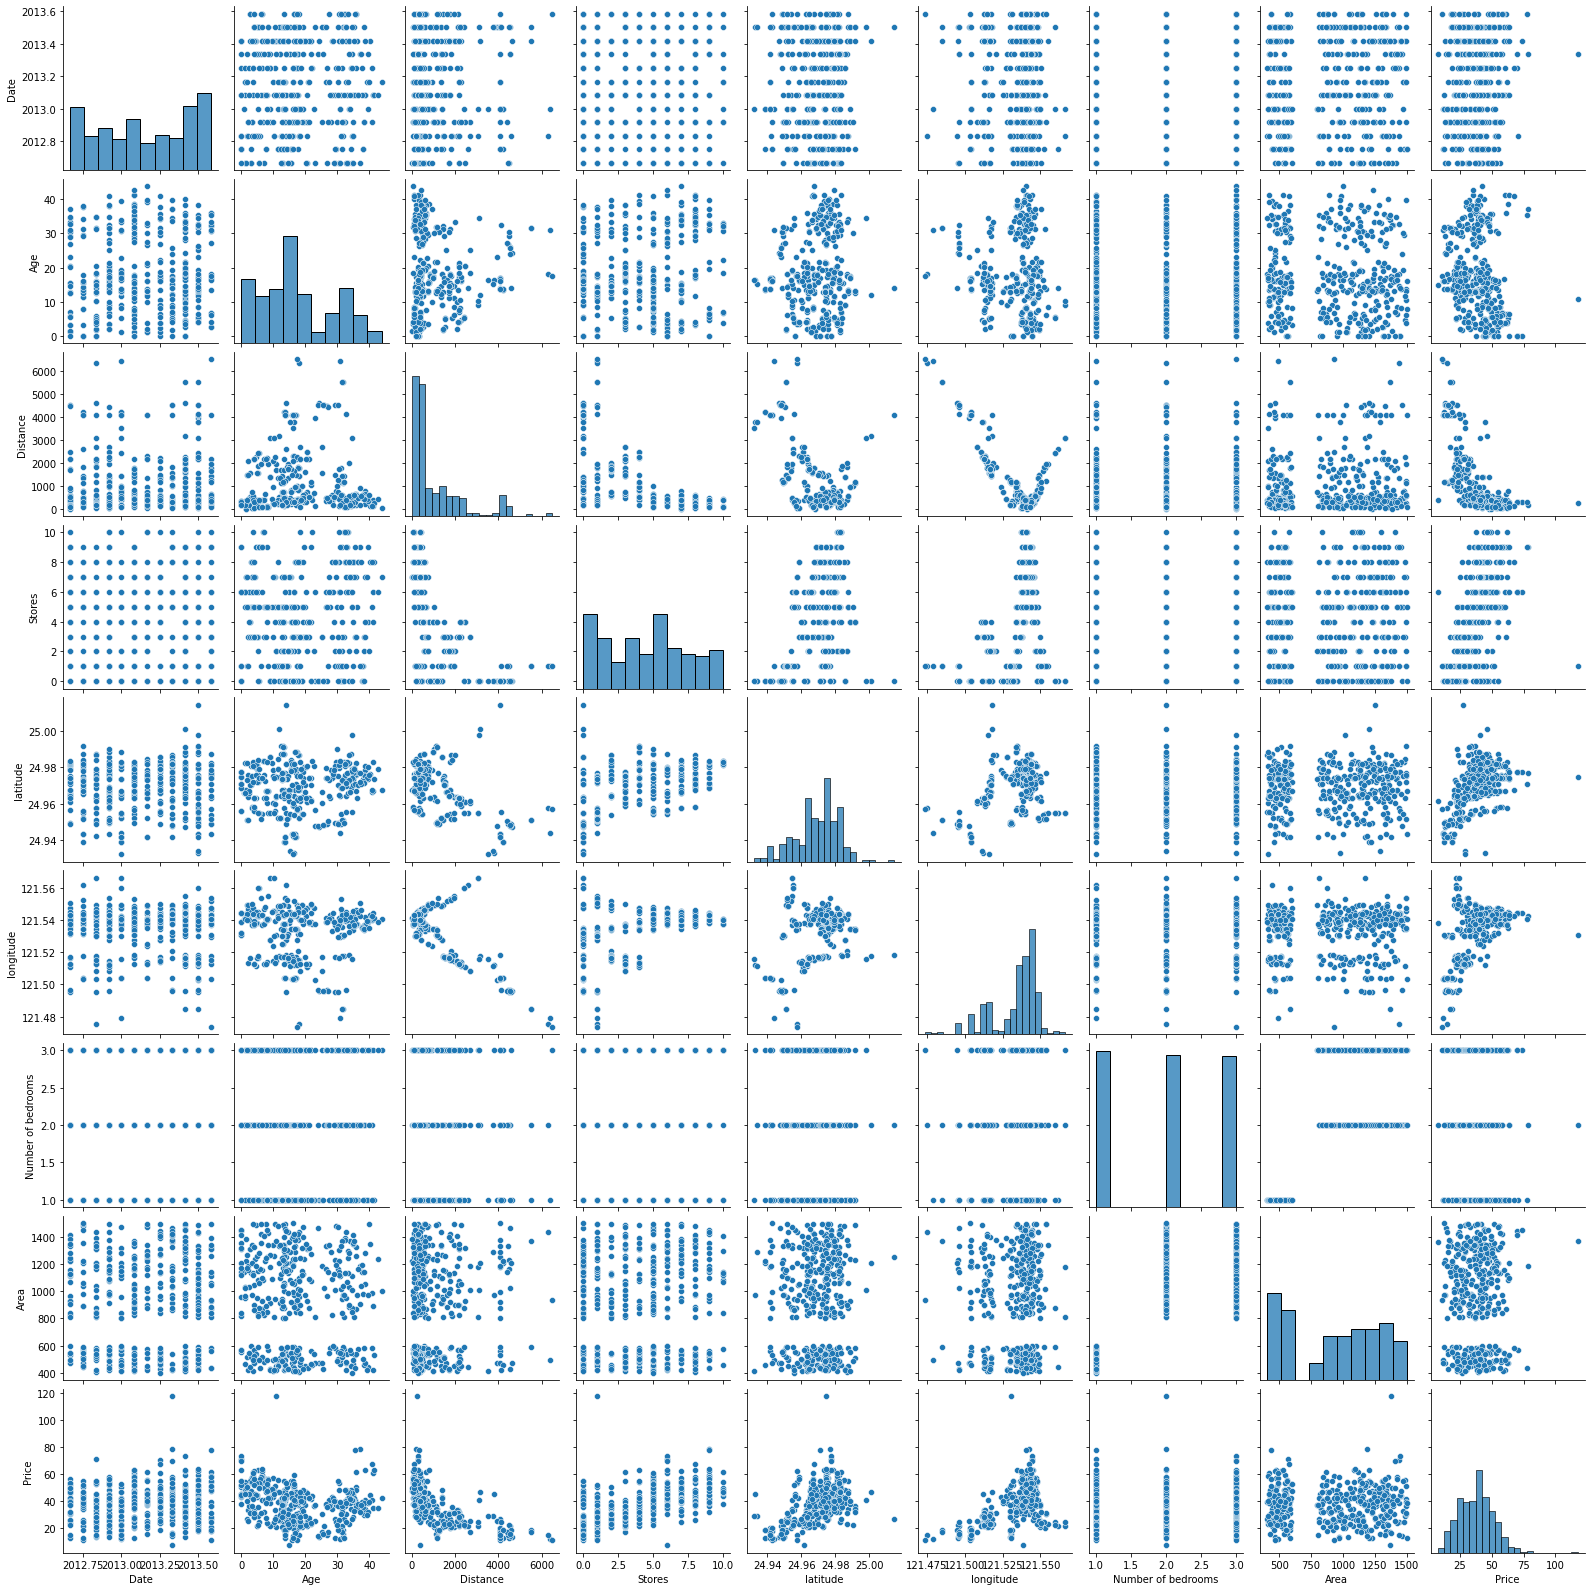

In [102]:
sns.pairplot(df,palette='viridis')

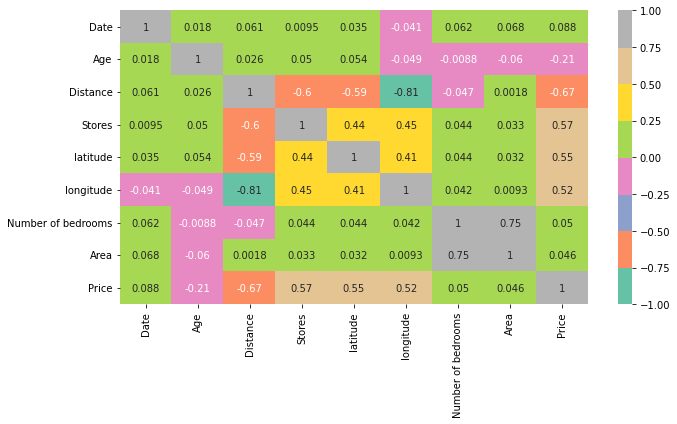

In [103]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True,cmap='Set2',vmin=-1,vmax=1)
plt.tight_layout()

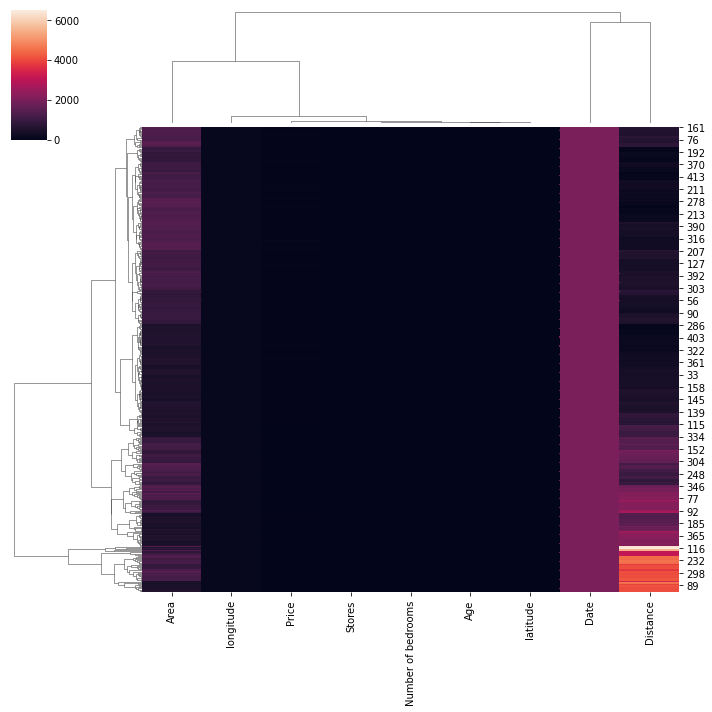

In [104]:
sns.clustermap(df)

Creating a copy of the original dataframe

In [105]:
data=df.copy()
data.head()

,Date,Age,Distance,Stores,latitude,longitude,Number of bedrooms,Area,Price
0,2012.916667,32.0,84.87882,10,24.98298,121.54024,1,575,37.9
1,2012.916667,19.5,306.59470,9,24.98034,121.53951,2,1240,42.2
2,2013.583333,13.3,561.98450,5,24.98746,121.54391,3,1060,47.3
3,2013.500000,13.3,561.98450,5,24.98746,121.54391,2,875,54.8
4,2012.833333,5.0,390.56840,5,24.97937,121.54245,1,491,43.1


Feature Scaling using Standard Scaler


In [106]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error 

In [107]:
scaler = StandardScaler()
features = data.columns
data = scaler.fit_transform(data)
data = pd.DataFrame(data,columns=features)
data.head()

,Date,Age,Distance,Stores,latitude,longitude,Number of bedrooms,Area,Price
0,-0.824722,1.255628,-0.792495,2.007407,1.125430,0.448762,-1.207899,-1.022920,-0.005901
1,-0.824722,0.157086,-0.616612,1.667503,0.912444,0.401139,0.014766,0.885321,0.310507
2,1.542244,-0.387791,-0.414015,0.307885,1.486860,0.688183,1.237432,0.368804,0.685782
3,1.246373,-0.387791,-0.414015,0.307885,1.486860,0.688183,0.014766,-0.162059,1.237656
4,-1.120593,-1.117223,-0.549997,0.307885,0.834188,0.592937,-1.207899,-1.263960,0.376732


Splitting the dataset into training and test sets

In [109]:

X = df.drop('Area',axis=1)
y = df.Area


In [110]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor

In [111]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=101,shuffle=True)

Model Training & Evaluation

In [112]:
models = []
scores = []

In [113]:
def fit_and_test_model(model):
    model.fit(X_train,y_train)
    pred = model.predict(X_test)
    print("RMSE:",np.sqrt(mean_squared_error(y_test,pred)))
    print("R2 Score:",r2_score(y_test,pred))
    models.append(str(model).split('(')[0])
    scores.append(r2_score(y_test,pred))

In [114]:
fit_and_test_model(LinearRegression())

RMSE: 224.75529427576376
R2 Score: 0.621218905928888


In [115]:
fit_and_test_model(KNeighborsRegressor())

RMSE: 393.737772229183
R2 Score: -0.1624722442814266


In [116]:
fit_and_test_model(SVR())

RMSE: 365.7402179064142
R2 Score: -0.003029881629486253


In [117]:
fit_and_test_model(GradientBoostingRegressor())

RMSE: 183.73251944832083
R2 Score: 0.7468718217292218


In [118]:
fit_and_test_model(BaggingRegressor())

RMSE: 187.01466081566977
R2 Score: 0.737747437348546


In [119]:
from sklearn.ensemble import HistGradientBoostingRegressor ,ExtraTreesRegressor
fit_and_test_model(HistGradientBoostingRegressor())


RMSE: 183.0568339406987
R2 Score: 0.7487301813401527


In [120]:
fit_and_test_model(ExtraTreesRegressor())

RMSE: 183.07225334495666
R2 Score: 0.7486878491965712


In [121]:
fit_and_test_model(DecisionTreeRegressor())


RMSE: 220.2260111794245
R2 Score: 0.6363315225450712


In [122]:
pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [124]:
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor

In [125]:

fit_and_test_model(RandomForestRegressor())

RMSE: 176.32666645065348
R2 Score: 0.7668666378841955


In [126]:
fit_and_test_model(XGBRegressor())

[16:21:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
RMSE: 182.27524964594838
R2 Score: 0.7508712572774174


In [127]:
fit_and_test_model(CatBoostRegressor())


Learning rate set to 0.033651
0:	learn: 333.8056655	total: 5.6ms	remaining: 5.6s
1:	learn: 327.5890865	total: 8.7ms	remaining: 4.34s
2:	learn: 320.5943008	total: 10.8ms	remaining: 3.6s
3:	learn: 313.9948441	total: 14.9ms	remaining: 3.71s
4:	learn: 306.7463733	total: 17.7ms	remaining: 3.52s
5:	learn: 299.6430203	total: 19.4ms	remaining: 3.21s
6:	learn: 292.8347888	total: 20.7ms	remaining: 2.94s
7:	learn: 286.3605090	total: 22.4ms	remaining: 2.78s
8:	learn: 280.7420729	total: 25.5ms	remaining: 2.81s
9:	learn: 274.9479835	total: 29.3ms	remaining: 2.9s
10:	learn: 270.3941073	total: 32.2ms	remaining: 2.89s
11:	learn: 265.3278899	total: 34.8ms	remaining: 2.87s
12:	learn: 259.7896346	total: 36.2ms	remaining: 2.75s
13:	learn: 255.3386603	total: 38.6ms	remaining: 2.72s
14:	learn: 250.8464922	total: 42.4ms	remaining: 2.78s
15:	learn: 246.6868313	total: 46.2ms	remaining: 2.84s
16:	learn: 242.0610605	total: 48.8ms	remaining: 2.82s
17:	learn: 238.0555717	total: 51.1ms	remaining: 2.79s
18:	learn: 23

In [128]:
fit_and_test_model(MLPRegressor())

RMSE: 367.5664886535616
R2 Score: -0.013071859326163837


In [129]:
fit_and_test_model(LGBMRegressor())

RMSE: 179.72720738987752
R2 Score: 0.7577877603949322


Performance Comparison of Baseline Models

In [130]:
model_performances = pd.DataFrame([models,scores]).T
model_performances.columns = ['Model','R2 Score']
model_performances.set_index('Model',inplace=True)
model_performances = model_performances.sort_values('R2 Score',ascending=False)
model_performances

,R2 Score
Model,
RandomForestRegressor,0.766867
LGBMRegressor,0.757788
XGBRegressor,0.750871
<catboost.core.CatBoostRegressor object at 0x7f0690ed5400>,0.749946
HistGradientBoostingRegressor,0.74873
ExtraTreesRegressor,0.748688
GradientBoostingRegressor,0.746872
BaggingRegressor,0.737747
DecisionTreeRegressor,0.636332


Among the baseline models, Random Forest Regressor is the best performing model with an excellent accuracy score of about 76%


Model Optimization & Cross Validation using Hyperparameter Tuning


In [132]:
knn = KNeighborsRegressor()
dt = DecisionTreeRegressor()
rf = RandomForestRegressor()
cat = CatBoostRegressor(silent=True)
xgb = XGBRegressor(eval_metric = 'logloss', use_label_encoder=False)
bag = BaggingRegressor()
et = ExtraTreesRegressor()
gb = GradientBoostingRegressor()

In [133]:
#KNN
para_knn = {'n_neighbors':np.arange(1, 50),'metric': ['manhattan','euclidean','minkowski','chebyshev'],'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'], 'weights': ['uniform','distance']}  
grid_knn = GridSearchCV(knn, param_grid=para_knn) 

#Decision Tree
para_dt = {'criterion':["squared_error", "friedman_mse", "absolute_error","poisson"], 'max_depth':np.arange(1, 50), 'min_samples_leaf':[1,2,4,5,10,20,30,40,80,100]}
grid_dt = GridSearchCV(dt, param_grid=para_dt)

#Random Forest
params_rf = {'n_estimators':[100,200, 350,500], 'min_samples_leaf':[2, 10, 30], 'bootstrap': [True,False]}
grid_rf = GridSearchCV(rf, param_grid=params_rf)

In [134]:
#CatBoost
params_cat = {'n_estimators': [50,100,250,400,600,800,1000], 'learning_rate': [0.2,0.5,0.8,1]}
grid_cat =  GridSearchCV(cat, params_cat)

#XGBoost
params_xgb = {'n_estimators': [50,100,250,400,600,800,1000], 'learning_rate': [0.2,0.5,0.8,1]}
grid_xgb =  GridSearchCV(xgb, params_xgb)

#Bagging 
params_bag = {'n_estimators':[100,350,500,750]}
grid_bag = GridSearchCV(bag, params_bag)

#Extra Trees
params_et = {'n_estimators': [100,300,500,800,100], 'bootstrap': [True,False], 'max_features': ['sqrt','log2']}
grid_et = GridSearchCV(et, params_et)

#Gradient Boosting
params_gb = {'n_estimators': np.arange(100,900,200), 'learning_rate': np.linspace(0,1,5), 'max_features': ['sqrt','log2'], 'loss': ['squared_error', 'absolute_error', 'huber', 'quantile']}
grid_gb = GridSearchCV(gb, params_gb)

In [135]:
grid_knn.fit(X_train,y_train)
pred = grid_knn.predict(X_test)
print("RMSE:",np.sqrt(mean_squared_error(y_test,pred)))
print("R2 Score:",r2_score(y_test,pred))

RMSE: 362.92163290002725
R2 Score: 0.012370291483028262


In [136]:
grid_dt.fit(X_train,y_train)
pred = grid_dt.predict(X_test)
print("RMSE:",np.sqrt(mean_squared_error(y_test,pred)))
print("R2 Score:",r2_score(y_test,pred))

RMSE: 162.16513930024928
R2 Score: 0.8028106607482632


In [147]:
grid_rf.fit(X_train,y_train)
pred = grid_rf.predict(X_test)
print("RMSE:",np.sqrt(mean_squared_error(y_test,pred)))
print("R2 Score:",r2_score(y_test,pred))

RMSE: 161.36093015809533
R2 Score: 0.8047616133579134


In [148]:
grid_xgb.fit(X_train,y_train)
pred = grid_xgb.predict(X_test)
print("RMSE:",np.sqrt(mean_squared_error(y_test,pred)))
print("R2 Score:",r2_score(y_test,pred))

[16:48:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:48:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:48:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:48:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:48:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:48:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:48:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:48:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

In [149]:
grid_et.fit(X_train,y_train)
pred = grid_et.predict(X_test)
print("RMSE:",np.sqrt(mean_squared_error(y_test,pred)))
print("R2 Score:",r2_score(y_test,pred))

RMSE: 170.42737058396017
R2 Score: 0.7822053938012675


In [150]:
grid_cat.fit(X_train,y_train)
pred = grid_cat.predict(X_test)
print("RMSE:",np.sqrt(mean_squared_error(y_test,pred)))
print("R2 Score:",r2_score(y_test,pred))

RMSE: 181.95335833601968
R2 Score: 0.7517503845216698


In [151]:
grid_bag.fit(X_train,y_train)
pred = grid_bag.predict(X_test)
print("RMSE:",np.sqrt(mean_squared_error(y_test,pred)))
print("R2 Score:",r2_score(y_test,pred))

RMSE: 175.10518246404675
R2 Score: 0.770085462604739


In [146]:
grid_gb.fit(X_train,y_train)
pred = grid_gb.predict(X_test)
print("RMSE:",np.sqrt(mean_squared_error(y_test,pred)))
print("R2 Score:",r2_score(y_test,pred))

RMSE: 185.53202868601554
R2 Score: 0.7418891746438285


Upon completion of hyperparameter tuning of baseline models, the model which exhibits the best performance is Decision Trees Regressor as its accuracy score increased significantly from just over 63% to nearly 80%.
